# Time Series Analysis

## 1. Brief Overview

A <b>time series</b> is a set of observations for a variable over successive periods of time. For example, monthly returns of a stock for the past ten years. <br>
We are going to check out Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. <br>
We have check if there is a seasonal change or some other trend in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


## 2. Data Wrangling

First we will rename the columns names.

In [3]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
month      168 non-null object
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


It can be seen that the month variable is of object data type. We will have to convert it to DateTime data type using .to_datetime().

In [5]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3)
memory usage: 5.2 KB


In [7]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## 3. EDA

We can proceed by seeing how the time series looks like for all 3 key words, 'diet', 'gym', 'finance'. We have to understand one thing here which is that the trend should obviously gradually increase because as time has passed, the number of people who have access to net has also increased.

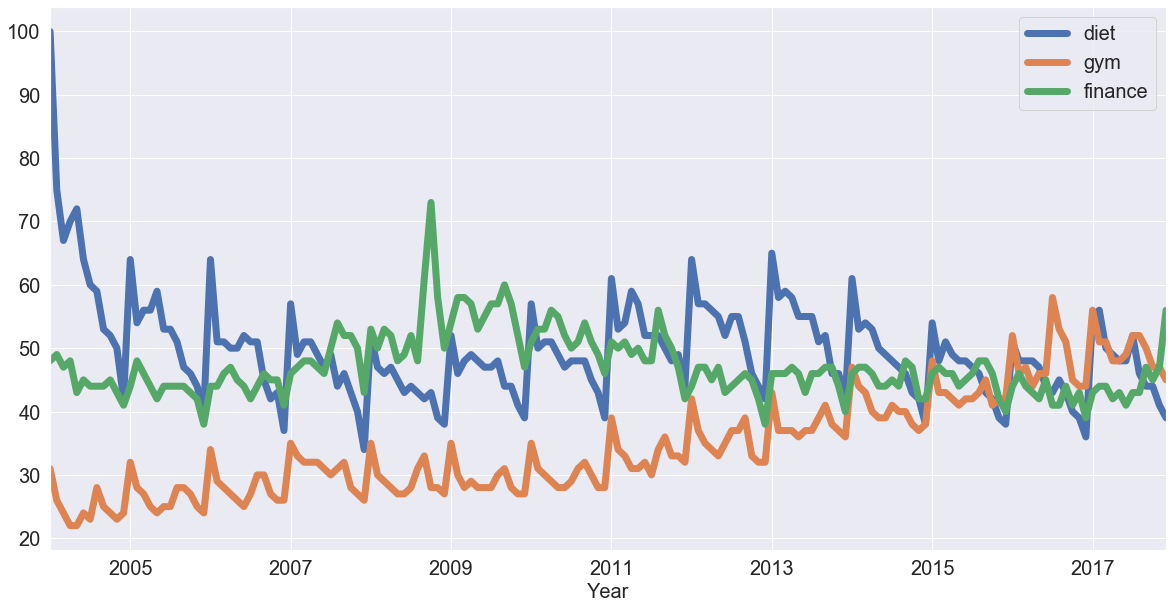

In [8]:
df.plot(figsize=(20,10), linewidth=7, fontsize=20)
plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Year', fontsize=20);

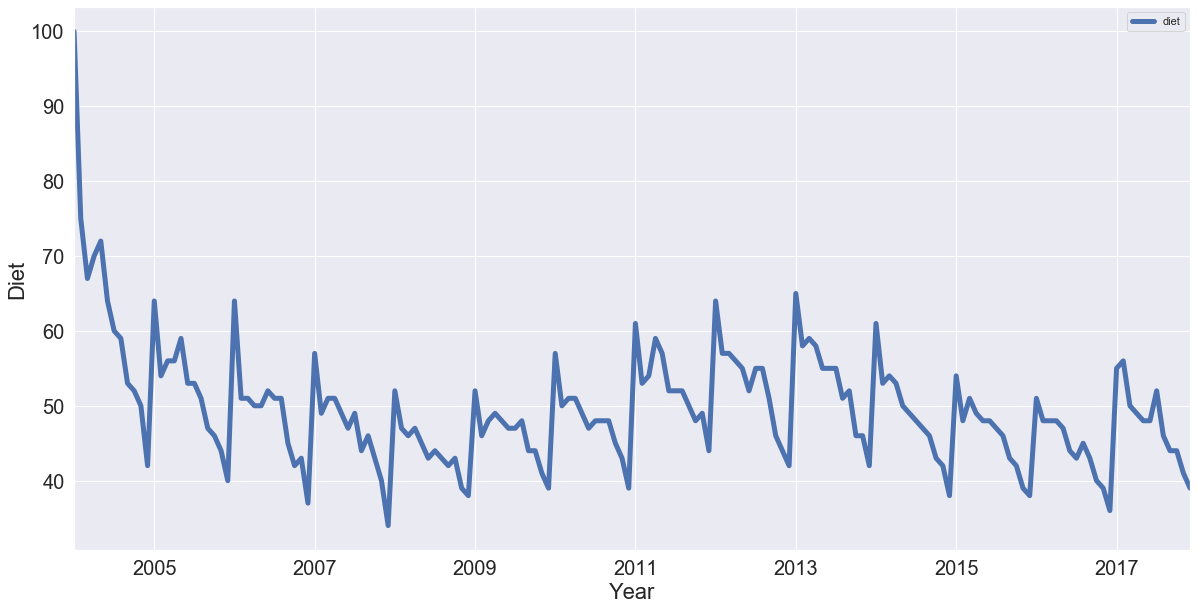

In [9]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=22);
plt.ylabel('Diet', fontsize=22);

In the above chart itself we can deduce that there is seasonality in the search of the key word 'diet'. And the from the chart before that we can see some seasonality in the key word 'gym' and 'finance' as well.


## 4. Trends and Seasonality

### 4.1 Trends

To figure out a trend in the data, we will have to first remove seasonality. We can do that by taking rolling averages. But here the important aspect will how big should we keep the window period for the rolling period. Here it makes sense to keep it at 12 because this will remove any monthly seasonality in the data.

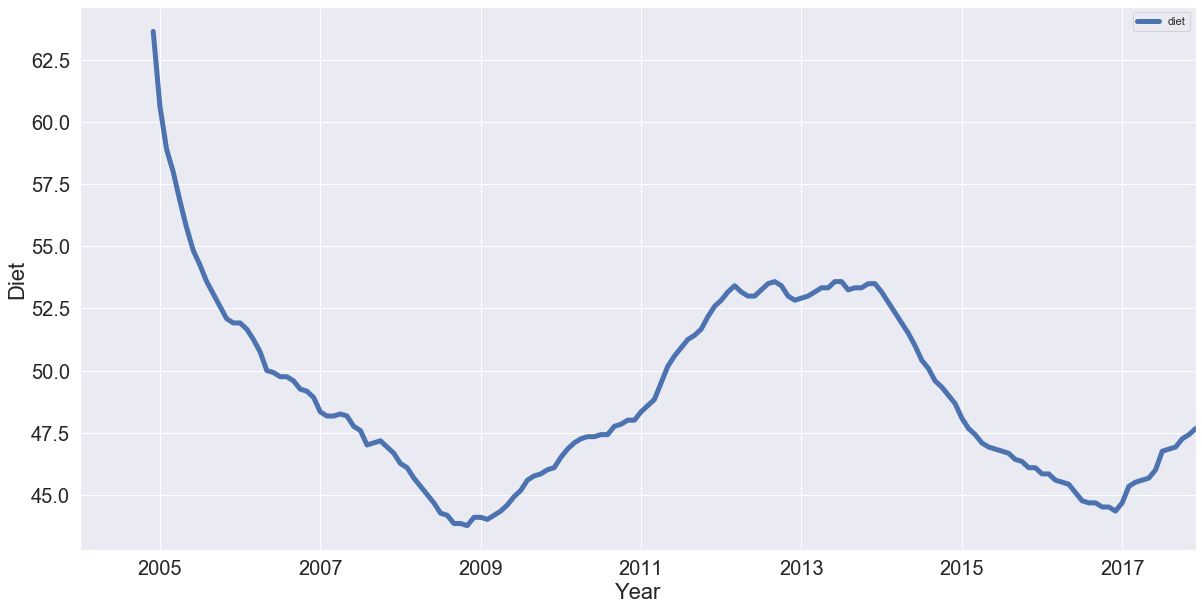

In [10]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=22);
plt.ylabel('Diet', fontsize=22);

We can do the same thing for 'gym' and 'finance'. In the above chunk of code, we have used two sets of squared brackets to extract the 'diet' column as a DataFrame; If we have used one set, we would have created a pandas Series.
<br> We can also compare the trend of all 3 words on the same chart after removing seasonality in all of them.

In [11]:
gym = df[['gym']]
finance = df[['finance']]
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(), finance.rolling(12).mean()], axis=1)
df_rm

,diet,gym,finance
month,,,
2004-01-01,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN
...,...,...,...
2017-08-01,46.833333,49.250000,42.500000
2017-09-01,46.916667,49.166667,42.750000
2017-10-01,47.250000,49.333333,43.083333


Obviously the rolling average for the first 12 time stamps would be NaN because we have set the rolling period as 12.

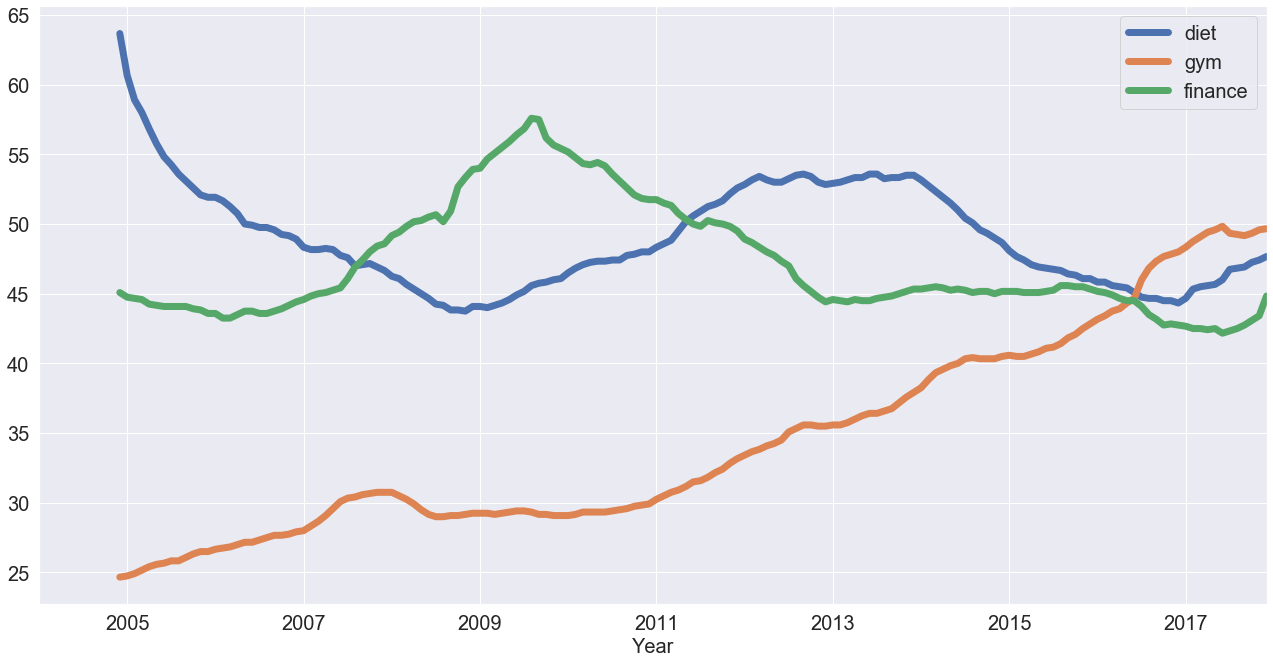

In [12]:
df_rm.plot(figsize=(22,11), linewidth=7, fontsize=20)
plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Year', fontsize=20);


We can see from the above chart that there is an uptrend in the search of key word 'gym' which makes sense because now people are becoming more conscious about their fitness.

### 4.2 Seasonality

To investigate the seasonality, we have to remove the trend from the time series. <br>It can be done by subtracting the trend we computed above, rolling mean from the original signal.<bR> We can also use differencing, where we look at the difference between successive data points (called first order differencing).

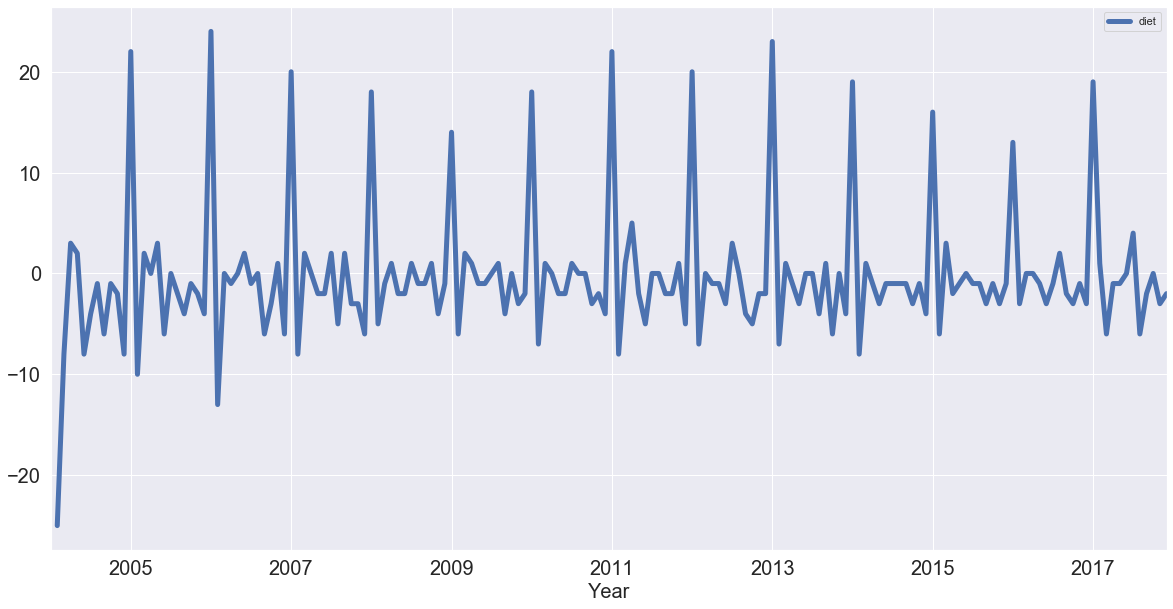

In [13]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

We can very clearly see the spike in month of January every year.<br> 
We use differencing to convert our time series into a stationary time series. Stationary time series is one whose statistical properties such as mean and variance don't change over time. 

#### Periodicity and Autocorrelation

A time series is periodic if it repeats itself at equally spaced. i.e, if a time series has a peak/trough somewhere, then it will have a peak/trough after a certain period as well. <br>
If a time series is correlated with itself shifted by a certain fixed period,then that means if you took the time series and moved it backwards or forwards by a certain fixed period, it would map onto itself in some way. This is captured by autocorrelation.

In [14]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


This tells us that 'diet' and 'gym' are negatively correlated,but this includes the trend as well as the seasonal component. <br>
From the above charts, we can see that the trend component of 'diet' and 'gym' might be negatively correlated but their season components might be positively correlated.

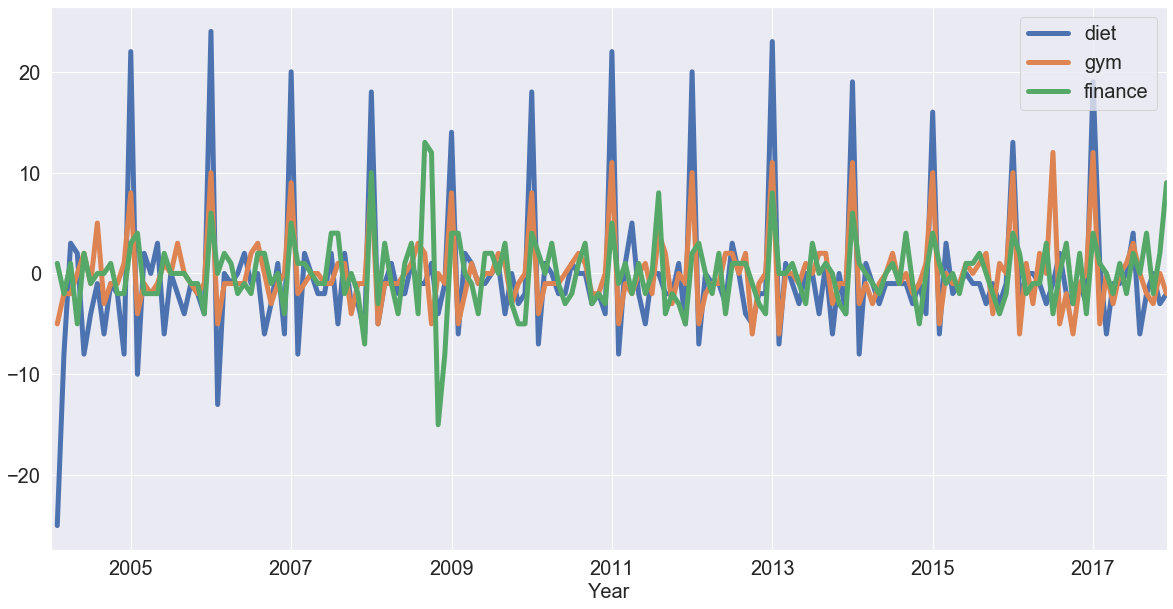

In [15]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Year', fontsize=20);

In [16]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


This is the seasonal correlation as we have removed the trend part by differencning the data.

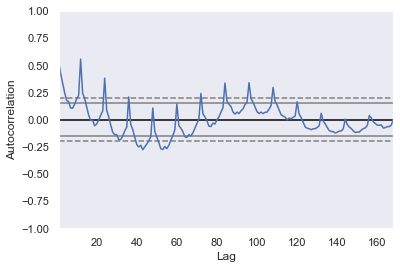

In [17]:
pd.plotting.autocorrelation_plot(diet);

We can see that it is 12 months at which we have this huge peak in correlation. We have another peak at a 24 month interval, where it's also correlated with itself. We have another peak at 36, but as we move further away, correlation decreases.<br>
The dotted lines in the above plot tells us about the statistical significance of the correlation.<br> We can say now that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

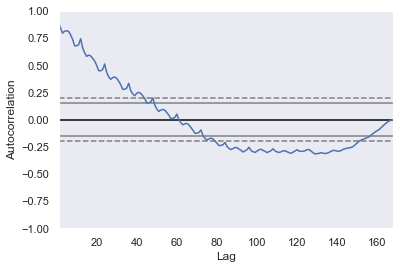

In [18]:
pd.plotting.autocorrelation_plot(gym);

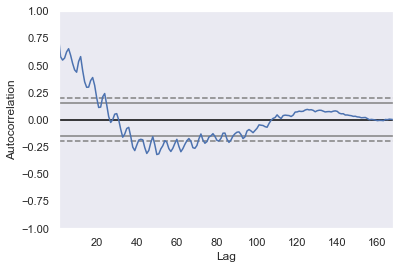

In [19]:
pd.plotting.autocorrelation_plot(finance);

We can see that the autocorrelation chart for 'gym' and 'finance' does not make any sense.

## 5. ARIMA Modelling

Autoregressive Integrated Moving Average Model is a class of statistical models used for analyzing and forecasting time series data. The approach uses previous time series data plus an error to forecast future values. ARIMA models work on the assumption that the time series is stationary.<br>

First, we fit an ARIMA(12,1,0) model. This sets the lag value to 12 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

In [20]:
model = ARIMA(diet, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\chashah4\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\chashah4\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.diet   No. Observations:                  167
Model:                ARIMA(12, 1, 0)   Log Likelihood                -427.229
Method:                       css-mle   S.D. of innovations              2.945
Date:                Tue, 24 Mar 2020   AIC                            882.458
Time:                        16:23:25   BIC                            926.110
Sample:                    02-01-2004   HQIC                           900.175
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3677      0.398     -0.923      0.357      -1.148       0.413
ar.L1.D.diet     -0.0728      0.053     -1.377      0.170      -0.177       0.031
ar.L2.D.diet     -0.0673      0.052     

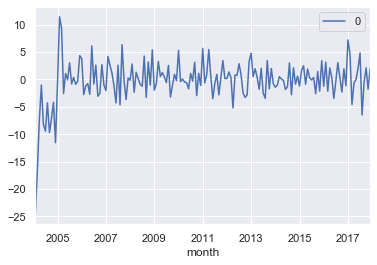

In [21]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

The line plot of the residual errors suggests that there may still be some trend information not captured by the model.

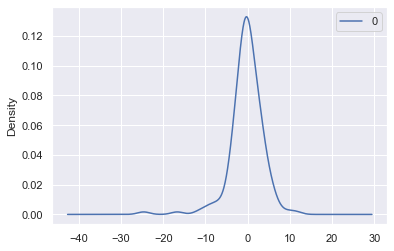

In [22]:
residuals.plot(kind='kde')
plt.show()

In [23]:
print(residuals.describe())

                0
count  167.000000
mean    -0.276527
std      3.965067
min    -24.632278
25%     -1.789351
50%     -0.149452
75%      1.929655
max     11.417970


The results of the residuals show that there is a bias in the prediction (a non-zero mean in the residuals).



In [24]:
X = diet.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [25]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(12,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=47.548322, expected=46.000000
predicted=43.702468, expected=46.000000
predicted=42.387806, expected=42.000000
predicted=62.278233, expected=61.000000
predicted=54.049627, expected=53.000000
predicted=53.575281, expected=54.000000
predicted=53.116263, expected=53.000000
predicted=49.803040, expected=50.000000
predicted=50.475234, expected=49.000000
predicted=49.263079, expected=48.000000
predicted=44.051324, expected=47.000000
predicted=49.136544, expected=46.000000
predicted=40.524000, expected=43.000000
predicted=42.782397, expected=42.000000
predicted=36.963993, expected=38.000000
predicted=55.012772, expected=54.000000
predicted=46.069113, expected=48.000000
predicted=48.675217, expected=51.000000
predicted=50.076973, expected=49.000000
predicted=45.962056, expected=48.000000
predicted=47.351388, expected=48.000000
predicted=47.002427, expected=47.000000
predicted=45.947167, expected=46.000000
predicted=45.763549, expected=43.000000
predicted=40.492698, expected=42.000000


In [26]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 6.642


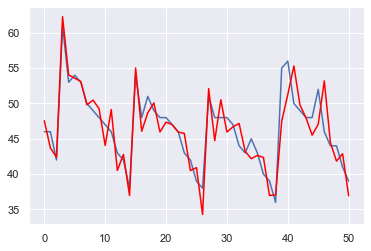

In [27]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()